# **MOVIE GENRE CLASSIFICATION**

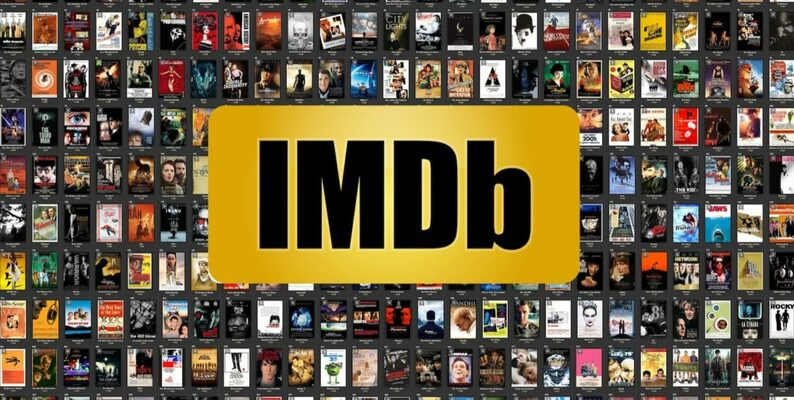

### **Importing Libraries and loading the training Dataset**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/content/train_data.txt',sep=':::',header=None,engine ='python')
train_data.columns=['Id','Movie','Genre','Synopsis']
train_data

,Id,Movie,Genre,Synopsis
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


**Printing First 5 rows**

In [3]:
train_data.head()

,Id,Movie,Genre,Synopsis
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


**Printing Last 5 rows**

In [4]:
train_data.tail()

,Id,Movie,Genre,Synopsis
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


**The Dimensions**

In [5]:
train_data.shape

(54214, 4)

**Checking for Missing Values**

In [6]:
train_data.isna().sum()

Id          0
Movie       0
Genre       0
Synopsis    0
dtype: int64

**Checking for Duplicate Values**

In [7]:
train_data.duplicated().sum()

0

**Distribution of Genre**

In [8]:
genre_count = train_data['Genre'].value_counts()
genre_count

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

Text(0, 0.5, 'Genre')

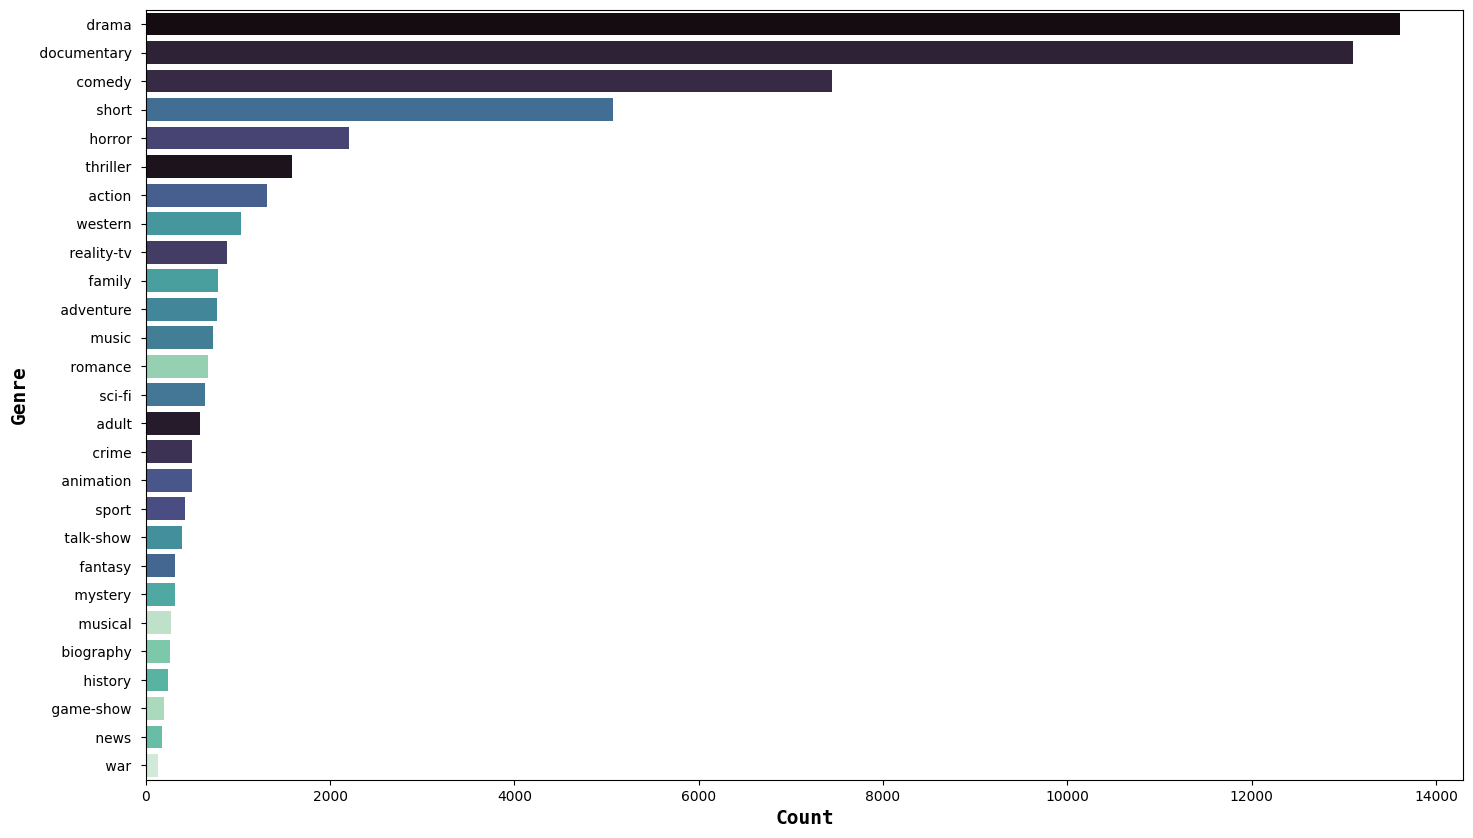

In [9]:
plt.figure(figsize=(17,10))
sns.countplot(y='Genre', data = train_data, hue ='Genre',legend=False, order=genre_count.index, palette='mako')
plt.xlabel('Count', fontsize=14, family = 'monospace' , fontweight='bold')
plt.ylabel('Genre', fontsize=14,family = 'monospace', fontweight='bold')

In [10]:
genre_list = train_data['Genre'].unique()
glist= list(genre_list)
glist

[' drama ',
 ' thriller ',
 ' adult ',
 ' documentary ',
 ' comedy ',
 ' crime ',
 ' reality-tv ',
 ' horror ',
 ' sport ',
 ' animation ',
 ' action ',
 ' fantasy ',
 ' short ',
 ' sci-fi ',
 ' music ',
 ' adventure ',
 ' talk-show ',
 ' western ',
 ' family ',
 ' mystery ',
 ' history ',
 ' news ',
 ' biography ',
 ' romance ',
 ' game-show ',
 ' musical ',
 ' war ']

### **Loading the Test Data**

In [11]:
test_data = pd.read_csv('/content/test_data.txt',sep=':::',header=None,engine ='python')
test_data.columns=['Id','Movie','Synopsis']
test_data

,Id,Movie,Synopsis
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [12]:
test_data.head()

,Id,Movie,Synopsis
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [13]:
test_data.tail()

,Id,Movie,Synopsis
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."
54199,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ..."


In [14]:
test_data.shape

(54200, 3)

### **Preprocessing**

***Creating a Function to clean the train and test sets individually***.

In [15]:
import nltk

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [17]:
from nltk.corpus import stopwords
from nltk import TweetTokenizer
from os.path import join
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tk = TweetTokenizer()
stemmer = SnowballStemmer('english')
sw = stopwords.words('english')
vec = TfidfVectorizer()

In [19]:
def clean_data(texts):
  # Splitting the text into tokens and rejoining them with spaces
  texts = texts.apply(lambda x : tk.tokenize(x)).apply(lambda x : ' '.join(x))
  # Remove non-alphanumeric characters
  texts = texts.str.replace('[^a-zA-Z0-9]+',' ')
  # Remove words with length less than 4
  texts = texts.apply(lambda x : ' '.join(w for w in word_tokenize(x) if len(w)>3))
  # stemming the words and rejoining them with spaces
  texts = texts.apply(lambda x : ' '.join([stemmer.stem(i.lower()) for i in tk.tokenize(x)]))
  # Removing Stopwords
  texts = texts.apply(lambda x : [i for i in tk.tokenize(x) if i not in sw]).apply(lambda x : ' '.join(x))
  return texts

### **Cleaning the Texts and adding it to the respective Data frame**

In [20]:
train_data['Cleaned_Synopsis'] = clean_data(texts = train_data['Synopsis'])
test_data['Cleaned_Synopsis'] = clean_data(texts = test_data['Synopsis'])

### **Vectorization**

In [21]:
train_vector = vec.fit_transform(train_data['Cleaned_Synopsis'])
test_vector= vec.transform(test_data['Cleaned_Synopsis'])

### **Defining Train and Test Data**

In [22]:
x = train_vector
y = train_data['Genre']

### **Since the Dataset has an imbalance we will use Over sampling to balance the Data.**

In [23]:
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
X,Y=sampler.fit_resample(x,y)
print("Orginal test set shape:",Counter(y))
print("Resampled test set shape:",Counter(Y))

Orginal test set shape: Counter({' drama ': 13613, ' documentary ': 13096, ' comedy ': 7447, ' short ': 5073, ' horror ': 2204, ' thriller ': 1591, ' action ': 1315, ' western ': 1032, ' reality-tv ': 884, ' family ': 784, ' adventure ': 775, ' music ': 731, ' romance ': 672, ' sci-fi ': 647, ' adult ': 590, ' crime ': 505, ' animation ': 498, ' sport ': 432, ' talk-show ': 391, ' fantasy ': 323, ' mystery ': 319, ' musical ': 277, ' biography ': 265, ' history ': 243, ' game-show ': 194, ' news ': 181, ' war ': 132})
Resampled test set shape: Counter({' drama ': 13613, ' thriller ': 13613, ' adult ': 13613, ' documentary ': 13613, ' comedy ': 13613, ' crime ': 13613, ' reality-tv ': 13613, ' horror ': 13613, ' sport ': 13613, ' animation ': 13613, ' action ': 13613, ' fantasy ': 13613, ' short ': 13613, ' sci-fi ': 13613, ' music ': 13613, ' adventure ': 13613, ' talk-show ': 13613, ' western ': 13613, ' family ': 13613, ' mystery ': 13613, ' history ': 13613, ' news ': 13613, ' biogr

### **Splitting the Dataset into Testing and training data**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### **Model creation and Evaluation**.

***Using Naive Bayes, Logistic Regression and SVM for Model Creation and Further Evaluating them***

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report
Nb_model = MultinomialNB()
log_model = LogisticRegression(C=1, solver="liblinear",max_iter=200)
svm_model = LinearSVC()
a_models = [Nb_model,log_model,svm_model]

In [26]:
for i in a_models:
  print("Model:",i)
  print('-'*150)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  score=accuracy_score(y_test,y_pred)
  print("Accuracy score:",score)
  print("Model Evaluation Result:")
  print(classification_report(y_test,y_pred))
  print("="*150)

Model: MultinomialNB()
------------------------------------------------------------------------------------------------------------------------------------------------------
Accuracy score: 0.907265579301057
Model Evaluation Result:
               precision    recall  f1-score   support

      action        0.90      0.88      0.89      2626
       adult        0.95      0.98      0.97      2761
   adventure        0.94      0.93      0.93      2684
   animation        0.98      0.97      0.97      2790
   biography        0.94      0.99      0.97      2710
      comedy        0.82      0.60      0.69      2712
       crime        0.94      0.98      0.96      2691
 documentary        0.68      0.62      0.65      2667
       drama        0.67      0.42      0.52      2775
      family        0.93      0.93      0.93      2696
     fantasy        0.96      0.99      0.97      2854
   game-show        0.98      0.99      0.99      2700
     history        0.96      1.00      0.98      2

### **Genre Prediction using Naive Bayes Model**

In [30]:
# Predicting the genre of the test data based on the given synopsis

test_pred = Nb_model.predict(test_vector)

# creating a new column for the predicted Genre and adding it to the Dataframe

test_data['Genre_predicted'] = test_pred
print(test_data)

          Id                             Movie  \
0          1             Edgar's Lunch (1998)    
1          2         La guerra de papá (1977)    
2          3      Off the Beaten Track (2010)    
3          4           Meu Amigo Hindu (2015)    
4          5                Er nu zhai (1955)    
...      ...                               ...   
54195  54196   "Tales of Light & Dark" (2013)    
54196  54197      Der letzte Mohikaner (1965)    
54197  54198              Oliver Twink (2007)    
54198  54199                Slipstream (1973)    
54199  54200        Curitiba Zero Grau (2010)    

                                                Synopsis  \
0       L.R. Brane loves his life - his car, his apar...   
1       Spain, March 1964: Quico is a very naughty ch...   
2       One year in the life of Albin and his family ...   
3       His father has died, he hasn't spoken with hi...   
4       Before he was known internationally as a mart...   
...                                    